499 27


/tmp/ipykernel_7683/3818502188.py:145: RuntimeWarning: divide by zero encountered in log
  p=ax_main.imshow(np.log(flux2d), interpolation='gaussian', aspect='auto', origin='lower',
/tmp/ipykernel_7683/3818502188.py:147: RuntimeWarning: divide by zero encountered in log10
  ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)


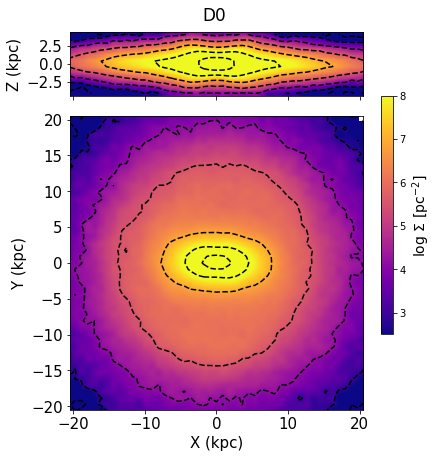

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
#import h5py
#import numpy as np
#import matplotlib.pyplot as plt
import time
#import pandas as pd
#from readorbits import ReadOrbits
#import tables as tb
import math
import random
#import agama 
import os
from matplotlib.path import Path
from scipy import stats
#from tqdm import tqdm
import pynbody 
from matplotlib.colors import LogNorm

#Function to calculate the rotation angle for bringing the bar along x axis:        
def rotationangle(ang_max):
    if ang_max>=0 and ang_max <=90:
        return -ang_max
    elif ang_max>=90 and ang_max <=180:
        return 180-ang_max
    elif ang_max>=180 and ang_max <=270:
        return 180-ang_max
    elif ang_max >=270 and ang_max <=360:
        return 360-ang_max
    
    
#Function to calculate the fourier mode (f1): 
def fourier(x,z):
    theta=np.arctan(z/x)
    a1=np.cos(theta)
    b1=np.sin(theta)
    
    f=np.sum(np.sqrt(a1*a1+b1*b1))
    return f

f1z=[]
for i in range(499,500):
    if i<10:
        snap='Spin100_D0/snapshot_00'+str(i)
        check="XZ00"+ str(i)+".png"
    elif i<100:
        snap= 'Spin100_D0/snapshot_0'+str(i)
        check="XZ0"+ str(i)+".png"
    else:    
        snap='Spin100_D0/snapshot_'+ str(i)
        check="XZ"+ str(i)+".png"
    s=pynbody.load(snap)
    dm=s.dark
    disk=s.star

    x=disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    y=disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    z=disk['pos'][:,2]-np.mean(disk['pos'][:,2])

    r=np.sqrt(x*x+y*y)
    msk=np.where((r>=3) & (r<=8))

    x1=x[msk]
    y1=y[msk]

    #plt.scatter(x1,y1)
    theta=np.arctan(y1/x1)*180/3.1415
    count=[]
    ang=[]
    msk0=np.where((x1>0)&(y1>0))
    t0=theta[msk0]
    msk1=np.where((x1<0) & (y1>0))
    t1=theta[msk1]+180
    msk2=np.where((x1<0) & (y1<0))
    t2=theta[msk2]+180
    msk3= np.where((x1>0) & (y1<0))
    t3=theta[msk3]+360

    t=np.concatenate([t0,t1,t2,t3])
    dummy=0
    for k in range(0,60): 
        bin=k*6
        msk4=np.where((t>bin)&(t<bin+6))
        temp=t[msk4]
        ang.append(bin+3)
        count.append(len(temp))
        if dummy < len(temp):
            dummy=len(temp)
            ang_max1=bin+3
  
    
    rot_angle=rotationangle(ang_max1)  
    print(i,rot_angle)

    disk.rotate_z(rot_angle)
    disk=s.star
    
    dx = disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    dy = disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    dz = disk['pos'][:,2]-np.mean(disk['pos'][:,2])
    
    
    
    dvx = disk['vel'][:,0]-np.mean(disk['vel'][:,0])
    dvy = disk['vel'][:,1]-np.mean(disk['vel'][:,1])
    dvz = disk['vel'][:,2]-np.mean(disk['vel'][:,2])
    
    masd = np.full(len(dx), 1.0)
    mass_arr = np.full(len(dx), 1.0)
    
    
    xbin = np.linspace(-22,22, 50)
    ybin = np.linspace(-22,22, 50)
    zbin = np.linspace(-4.5,4.5, 13)
    
    fluxH  = stats.binned_statistic_2d(dx, dy, mass_arr, 'count', bins=[ xbin, ybin])
    flux2d = fluxH.statistic.T
    
    fluxH_ed  = stats.binned_statistic_2d(dx, dz, mass_arr, 'count', bins=[ xbin, zbin])
    flux2d_ed = fluxH_ed.statistic.T

    fluxH_ed2  = stats.binned_statistic_2d(dy, dz, mass_arr, 'count', bins=[ ybin, zbin])
    flux2d_ed2 = fluxH_ed2.statistic.T        
    
    xpp = ( (xbin[:-1] + ybin[1:]) / 2 )
    ypp = ( (xbin[:-1] + ybin[1:]) / 2 )
    zpp = ( (zbin[:-1] + zbin[1:]) / 2 )
    X1,Y1 = np.meshgrid(xpp,ypp)
    
    l1 = 2.5
    l2 = 8
    #ax = plt.figure(figsize=(6, 6))
    fig=plt.figure(figsize=(8,7))
    # define the axes positions
    # define the axes positions
    left = bottom = 0.24 #0.29
    width = height =0.6 # 0.6
    
    ax_main = plt.axes([left, bottom, width, height])
    
    ax_top = plt.axes([left, bottom + height, width, 0.19])
    
    
    p=ax_main.imshow(np.log(flux2d), interpolation='gaussian', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], ybin[0], ybin[-1]],cmap='plasma', vmin=l1, vmax=l2, )
    ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
    cc=fig.colorbar(p,ax=(ax_top,ax_main),shrink=0.6, fraction=.1)
    cc.set_label(label='$ \mathrm{log} $ $\Sigma$ [$\mathrm{pc^{-2}}$]' ,fontsize = 14 , labelpad=4)
    
    ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], zbin[0], zbin[-1]],cmap='plasma',vmin=l1, vmax=l2)
    ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')
    
    # make all the limits consistent
    ax_top.set_xlim(-20.5, 20.5)
    ax_top.set_ylim(-4.5, 4.5)
    #ax_main.set_xlabel("X (kpc)",fontsize = 10)
    ax_top.set_ylabel("Z (kpc)",fontsize = 15)
    ax_top.tick_params(labelsize=15)
    ax_top.set_aspect('equal')
    
    
    #ax_main.set_xlim(xbin[0], xbin[-1])
    #ax_main.set_ylim(ybin[0], ybin[-1])
    ax_main.set_xlim(-20.5, 20.5)
    ax_main.set_ylim(-20.5, 20.5)
    ax_main.set_xlabel("X (kpc)",fontsize = 15)
    ax_main.set_ylabel("Y (kpc)",fontsize = 15)
    ax_main.tick_params(labelsize=15)
    ax_main.set_aspect('equal')
    #textstr = "  \u03B8 = 80$^{\u03BF}$ , \u03C8$_{bar}$ = 2$^{\u03BF}$  "
    textstr='D0' # 't = '+str("{:.2f}".format(i*0.0196)) +'  Gyr'
    ax_top.text(-2, 6, textstr,color='black' ,fontsize=17)
    
    xticks = ax_main.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)
    xticks[-1].label1.set_visible(False)
    
    yticks = ax_main.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)
    yticks[-1].label1.set_visible(False)
       
    
    # remove the tick labels for the top and right axes.
    ax_top.set_xticklabels([])
    #ax_top.set_yticklabels([])
    #ax_right.set_xticklabels([])
    plt.show()
    #plt.savefig(check,bbox_inches = 'tight')
    

# Model D1

499 -33


/tmp/ipykernel_5695/2304365393.py:145: RuntimeWarning: divide by zero encountered in log
  p=ax_main.imshow(np.log(flux2d), interpolation='gaussian', aspect='auto', origin='lower',
/tmp/ipykernel_5695/2304365393.py:147: RuntimeWarning: divide by zero encountered in log10
  ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
/tmp/ipykernel_5695/2304365393.py:151: RuntimeWarning: divide by zero encountered in log
  ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
/tmp/ipykernel_5695/2304365393.py:153: RuntimeWarning: divide by zero encountered in log10
  ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')


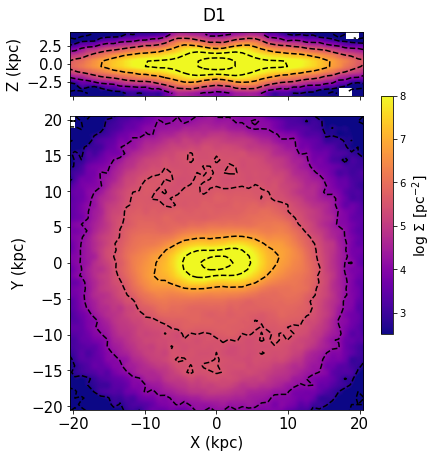

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
#import h5py
#import numpy as np
#import matplotlib.pyplot as plt
import time
#import pandas as pd
#from readorbits import ReadOrbits
#import tables as tb
import math
import random
#import agama 
import os
from matplotlib.path import Path
from scipy import stats
#from tqdm import tqdm
import pynbody 
from matplotlib.colors import LogNorm

#Function to calculate the rotation angle for bringing the bar along x axis:        
def rotationangle(ang_max):
    if ang_max>=0 and ang_max <=90:
        return -ang_max
    elif ang_max>=90 and ang_max <=180:
        return 180-ang_max
    elif ang_max>=180 and ang_max <=270:
        return 180-ang_max
    elif ang_max >=270 and ang_max <=360:
        return 360-ang_max
    
    
#Function to calculate the fourier mode (f1): 
def fourier(x,z):
    theta=np.arctan(z/x)
    a1=np.cos(theta)
    b1=np.sin(theta)
    
    f=np.sum(np.sqrt(a1*a1+b1*b1))
    return f

f1z=[]
for i in range(499,500):
    if i<10:
        snap='Spin100_D0/snapshot_00'+str(i)
        check="XZ00"+ str(i)+".png"
    elif i<100:
        snap= 'Spin100_D0/snapshot_0'+str(i)
        check="XZ0"+ str(i)+".png"
    else:    
        snap='Spin100_D1/snapshot_'+ str(i)
        check="XZ"+ str(i)+".png"
    s=pynbody.load(snap)
    dm=s.dark
    disk=s.star

    x=disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    y=disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    z=disk['pos'][:,2]-np.mean(disk['pos'][:,2])

    r=np.sqrt(x*x+y*y)
    msk=np.where((r>=3) & (r<=8))

    x1=x[msk]
    y1=y[msk]

    #plt.scatter(x1,y1)
    theta=np.arctan(y1/x1)*180/3.1415
    count=[]
    ang=[]
    msk0=np.where((x1>0)&(y1>0))
    t0=theta[msk0]
    msk1=np.where((x1<0) & (y1>0))
    t1=theta[msk1]+180
    msk2=np.where((x1<0) & (y1<0))
    t2=theta[msk2]+180
    msk3= np.where((x1>0) & (y1<0))
    t3=theta[msk3]+360

    t=np.concatenate([t0,t1,t2,t3])
    dummy=0
    for k in range(0,60): 
        bin=k*6
        msk4=np.where((t>bin)&(t<bin+6))
        temp=t[msk4]
        ang.append(bin+3)
        count.append(len(temp))
        if dummy < len(temp):
            dummy=len(temp)
            ang_max1=bin+3
  
    
    rot_angle=rotationangle(ang_max1)  
    print(i,rot_angle)

    disk.rotate_z(rot_angle)
    disk=s.star
    
    dx = disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    dy = disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    dz = disk['pos'][:,2]-np.mean(disk['pos'][:,2])
    
    
    
    dvx = disk['vel'][:,0]-np.mean(disk['vel'][:,0])
    dvy = disk['vel'][:,1]-np.mean(disk['vel'][:,1])
    dvz = disk['vel'][:,2]-np.mean(disk['vel'][:,2])
    
    masd = np.full(len(dx), 1.0)
    mass_arr = np.full(len(dx), 1.0)
    
    
    xbin = np.linspace(-22,22, 50)
    ybin = np.linspace(-22,22, 50)
    zbin = np.linspace(-4.5,4.5, 13)
    
    fluxH  = stats.binned_statistic_2d(dx, dy, mass_arr, 'count', bins=[ xbin, ybin])
    flux2d = fluxH.statistic.T
    
    fluxH_ed  = stats.binned_statistic_2d(dx, dz, mass_arr, 'count', bins=[ xbin, zbin])
    flux2d_ed = fluxH_ed.statistic.T

    fluxH_ed2  = stats.binned_statistic_2d(dy, dz, mass_arr, 'count', bins=[ ybin, zbin])
    flux2d_ed2 = fluxH_ed2.statistic.T        
    
    xpp = ( (xbin[:-1] + ybin[1:]) / 2 )
    ypp = ( (xbin[:-1] + ybin[1:]) / 2 )
    zpp = ( (zbin[:-1] + zbin[1:]) / 2 )
    X1,Y1 = np.meshgrid(xpp,ypp)
    
    l1 = 2.5
    l2 = 8
    #ax = plt.figure(figsize=(6, 6))
    fig=plt.figure(figsize=(8,7))
    # define the axes positions
    # define the axes positions
    left = bottom = 0.24 #0.29
    width = height =0.6 # 0.6
    
    ax_main = plt.axes([left, bottom, width, height])
    
    ax_top = plt.axes([left, bottom + height, width, 0.19])
    
    
    p=ax_main.imshow(np.log(flux2d), interpolation='gaussian', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], ybin[0], ybin[-1]],cmap='plasma', vmin=l1, vmax=l2, )
    ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
    cc=fig.colorbar(p,ax=(ax_top,ax_main),shrink=0.6, fraction=.1)
    cc.set_label(label='$ \mathrm{log} $ $\Sigma$ [$\mathrm{pc^{-2}}$]' ,fontsize = 14 , labelpad=4)
    
    ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], zbin[0], zbin[-1]],cmap='plasma',vmin=l1, vmax=l2)
    ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')
    
    # make all the limits consistent
    ax_top.set_xlim(-20.5, 20.5)
    ax_top.set_ylim(-4.5, 4.5)
    #ax_main.set_xlabel("X (kpc)",fontsize = 10)
    ax_top.set_ylabel("Z (kpc)",fontsize = 15)
    ax_top.tick_params(labelsize=15)
    ax_top.set_aspect('equal')
    
    
    #ax_main.set_xlim(xbin[0], xbin[-1])
    #ax_main.set_ylim(ybin[0], ybin[-1])
    ax_main.set_xlim(-20.5, 20.5)
    ax_main.set_ylim(-20.5, 20.5)
    ax_main.set_xlabel("X (kpc)",fontsize = 15)
    ax_main.set_ylabel("Y (kpc)",fontsize = 15)
    ax_main.tick_params(labelsize=15)
    ax_main.set_aspect('equal')
    #textstr = "  \u03B8 = 80$^{\u03BF}$ , \u03C8$_{bar}$ = 2$^{\u03BF}$  "
    textstr='D1' # 't = '+str("{:.2f}".format(i*0.0196)) +'  Gyr'
    ax_top.text(-2, 6, textstr,color='black' ,fontsize=17)
    
    xticks = ax_main.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)
    xticks[-1].label1.set_visible(False)
    
    yticks = ax_main.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)
    yticks[-1].label1.set_visible(False)
       
    
    # remove the tick labels for the top and right axes.
    ax_top.set_xticklabels([])
    #ax_top.set_yticklabels([])
    #ax_right.set_xticklabels([])
    plt.show()
    #plt.savefig(check,bbox_inches = 'tight')
    

# Model D2

499 57


/tmp/ipykernel_5695/942518202.py:145: RuntimeWarning: divide by zero encountered in log
  p=ax_main.imshow(np.log(flux2d), interpolation='hamming', aspect='auto', origin='lower',
/tmp/ipykernel_5695/942518202.py:147: RuntimeWarning: divide by zero encountered in log10
  ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
/tmp/ipykernel_5695/942518202.py:151: RuntimeWarning: divide by zero encountered in log
  ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
/tmp/ipykernel_5695/942518202.py:153: RuntimeWarning: divide by zero encountered in log10
  ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')


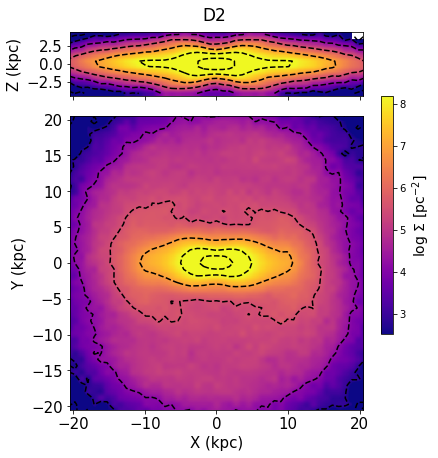

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
#import h5py
#import numpy as np
#import matplotlib.pyplot as plt
import time
#import pandas as pd
#from readorbits import ReadOrbits
#import tables as tb
import math
import random
#import agama 
import os
from matplotlib.path import Path
from scipy import stats
#from tqdm import tqdm
import pynbody 
from matplotlib.colors import LogNorm

#Function to calculate the rotation angle for bringing the bar along x axis:        
def rotationangle(ang_max):
    if ang_max>=0 and ang_max <=90:
        return -ang_max
    elif ang_max>=90 and ang_max <=180:
        return 180-ang_max
    elif ang_max>=180 and ang_max <=270:
        return 180-ang_max
    elif ang_max >=270 and ang_max <=360:
        return 360-ang_max
    
    
#Function to calculate the fourier mode (f1): 
def fourier(x,z):
    theta=np.arctan(z/x)
    a1=np.cos(theta)
    b1=np.sin(theta)
    
    f=np.sum(np.sqrt(a1*a1+b1*b1))
    return f

f1z=[]
for i in range(499,500):
    if i<10:
        snap='Spin100_D0/snapshot_00'+str(i)
        check="XZ00"+ str(i)+".png"
    elif i<100:
        snap= 'Spin100_D0/snapshot_0'+str(i)
        check="XZ0"+ str(i)+".png"
    else:    
        snap='Spin100_D2/snapshot_'+ str(i)
        check="XZ"+ str(i)+".png"
    s=pynbody.load(snap)
    dm=s.dark
    disk=s.star

    x=disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    y=disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    z=disk['pos'][:,2]-np.mean(disk['pos'][:,2])

    r=np.sqrt(x*x+y*y)
    msk=np.where((r>=3) & (r<=8))

    x1=x[msk]
    y1=y[msk]

    #plt.scatter(x1,y1)
    theta=np.arctan(y1/x1)*180/3.1415
    count=[]
    ang=[]
    msk0=np.where((x1>0)&(y1>0))
    t0=theta[msk0]
    msk1=np.where((x1<0) & (y1>0))
    t1=theta[msk1]+180
    msk2=np.where((x1<0) & (y1<0))
    t2=theta[msk2]+180
    msk3= np.where((x1>0) & (y1<0))
    t3=theta[msk3]+360

    t=np.concatenate([t0,t1,t2,t3])
    dummy=0
    for k in range(0,60): 
        bin=k*6
        msk4=np.where((t>bin)&(t<bin+6))
        temp=t[msk4]
        ang.append(bin+3)
        count.append(len(temp))
        if dummy < len(temp):
            dummy=len(temp)
            ang_max1=bin+3
  
    
    rot_angle=rotationangle(ang_max1)  
    print(i,rot_angle)

    disk.rotate_z(rot_angle)
    disk=s.star
    
    dx = disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    dy = disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    dz = disk['pos'][:,2]-np.mean(disk['pos'][:,2])
    
    
    
    dvx = disk['vel'][:,0]-np.mean(disk['vel'][:,0])
    dvy = disk['vel'][:,1]-np.mean(disk['vel'][:,1])
    dvz = disk['vel'][:,2]-np.mean(disk['vel'][:,2])
    
    masd = np.full(len(dx), 1.0)
    mass_arr = np.full(len(dx), 1.0)
    
    
    xbin = np.linspace(-22,22, 50)
    ybin = np.linspace(-22,22, 50)
    zbin = np.linspace(-4.5,4.5, 13)
    
    fluxH  = stats.binned_statistic_2d(dx, dy, mass_arr, 'count', bins=[ xbin, ybin])
    flux2d = fluxH.statistic.T
    
    fluxH_ed  = stats.binned_statistic_2d(dx, dz, mass_arr, 'count', bins=[ xbin, zbin])
    flux2d_ed = fluxH_ed.statistic.T

    fluxH_ed2  = stats.binned_statistic_2d(dy, dz, mass_arr, 'count', bins=[ ybin, zbin])
    flux2d_ed2 = fluxH_ed2.statistic.T        
    
    xpp = ( (xbin[:-1] + ybin[1:]) / 2 )
    ypp = ( (xbin[:-1] + ybin[1:]) / 2 )
    zpp = ( (zbin[:-1] + zbin[1:]) / 2 )
    X1,Y1 = np.meshgrid(xpp,ypp)
    
    l1 = 2.5
    l2 = 8.2
    #ax = plt.figure(figsize=(6, 6))
    fig=plt.figure(figsize=(8,7))
    # define the axes positions
    # define the axes positions
    left = bottom = 0.24 #0.29
    width = height =0.6 # 0.6
    
    ax_main = plt.axes([left, bottom, width, height])
    
    ax_top = plt.axes([left, bottom + height, width, 0.19])
    
    
    p=ax_main.imshow(np.log(flux2d), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], ybin[0], ybin[-1]],cmap='plasma', vmin=l1, vmax=l2, )
    ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
    cc=fig.colorbar(p,ax=(ax_top,ax_main),shrink=0.6, fraction=.1)
    cc.set_label(label='$ \mathrm{log} $ $\Sigma$ [$\mathrm{pc^{-2}}$]' ,fontsize = 14 , labelpad=4)
    
    ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], zbin[0], zbin[-1]],cmap='plasma',vmin=l1, vmax=l2)
    ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')
    
    # make all the limits consistent
    ax_top.set_xlim(-20.5, 20.5)
    ax_top.set_ylim(-4.5, 4.5)
    #ax_main.set_xlabel("X (kpc)",fontsize = 10)
    ax_top.set_ylabel("Z (kpc)",fontsize = 15)
    ax_top.tick_params(labelsize=15)
    ax_top.set_aspect('equal')
    
    
    #ax_main.set_xlim(xbin[0], xbin[-1])
    #ax_main.set_ylim(ybin[0], ybin[-1])
    ax_main.set_xlim(-20.5, 20.5)
    ax_main.set_ylim(-20.5, 20.5)
    ax_main.set_xlabel("X (kpc)",fontsize = 15)
    ax_main.set_ylabel("Y (kpc)",fontsize = 15)
    ax_main.tick_params(labelsize=15)
    ax_main.set_aspect('equal')
    #textstr = "  \u03B8 = 80$^{\u03BF}$ , \u03C8$_{bar}$ = 2$^{\u03BF}$  "
    textstr='D2' # 't = '+str("{:.2f}".format(i*0.0196)) +'  Gyr'
    ax_top.text(-2, 6, textstr,color='black' ,fontsize=17)
    
    xticks = ax_main.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)
    xticks[-1].label1.set_visible(False)
    
    yticks = ax_main.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)
    yticks[-1].label1.set_visible(False)
       
    
    # remove the tick labels for the top and right axes.
    ax_top.set_xticklabels([])
    #ax_top.set_yticklabels([])
    #ax_right.set_xticklabels([])
    plt.show()
    #plt.savefig(check,bbox_inches = 'tight')
    

499 15


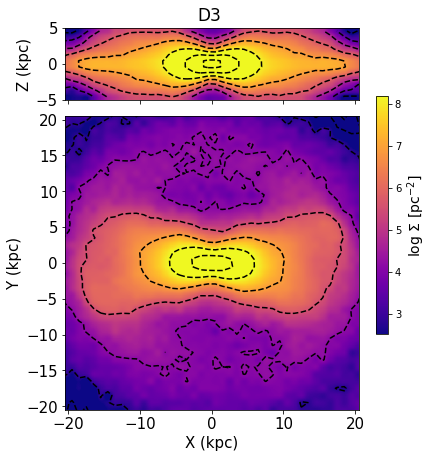

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
#import h5py
#import numpy as np
#import matplotlib.pyplot as plt
import time
#import pandas as pd
#from readorbits import ReadOrbits
#import tables as tb
import math
import random
#import agama 
import os
from matplotlib.path import Path
from scipy import stats
#from tqdm import tqdm
import pynbody 
from matplotlib.colors import LogNorm

#Function to calculate the rotation angle for bringing the bar along x axis:        
def rotationangle(ang_max):
    if ang_max>=0 and ang_max <=90:
        return -ang_max
    elif ang_max>=90 and ang_max <=180:
        return 180-ang_max
    elif ang_max>=180 and ang_max <=270:
        return 180-ang_max
    elif ang_max >=270 and ang_max <=360:
        return 360-ang_max
    
    
#Function to calculate the fourier mode (f1): 
def fourier(x,z):
    theta=np.arctan(z/x)
    a1=np.cos(theta)
    b1=np.sin(theta)
    
    f=np.sum(np.sqrt(a1*a1+b1*b1))
    return f

f1z=[]
for i in range(499,500):
    if i<10:
        snap='Spin100_D0/snapshot_00'+str(i)
        check="XZ00"+ str(i)+".png"
    elif i<100:
        snap= 'Spin100_D0/snapshot_0'+str(i)
        check="XZ0"+ str(i)+".png"
    else:    
        snap='Spin100_D3/snapshot_'+ str(i)
        check="XZ"+ str(i)+".png"
    s=pynbody.load(snap)
    dm=s.dark
    disk=s.star

    x=disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    y=disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    z=disk['pos'][:,2]-np.mean(disk['pos'][:,2])

    r=np.sqrt(x*x+y*y)
    msk=np.where((r>=3) & (r<=8))

    x1=x[msk]
    y1=y[msk]

    #plt.scatter(x1,y1)
    theta=np.arctan(y1/x1)*180/3.1415
    count=[]
    ang=[]
    msk0=np.where((x1>0)&(y1>0))
    t0=theta[msk0]
    msk1=np.where((x1<0) & (y1>0))
    t1=theta[msk1]+180
    msk2=np.where((x1<0) & (y1<0))
    t2=theta[msk2]+180
    msk3= np.where((x1>0) & (y1<0))
    t3=theta[msk3]+360

    t=np.concatenate([t0,t1,t2,t3])
    dummy=0
    for k in range(0,60): 
        bin=k*6
        msk4=np.where((t>bin)&(t<bin+6))
        temp=t[msk4]
        ang.append(bin+3)
        count.append(len(temp))
        if dummy < len(temp):
            dummy=len(temp)
            ang_max1=bin+3
  
    
    rot_angle=rotationangle(ang_max1)  
    print(i,rot_angle)

    disk.rotate_z(rot_angle)
    disk=s.star
    
    dx = disk['pos'][:,0]-np.mean(disk['pos'][:,0])
    dy = disk['pos'][:,1]-np.mean(disk['pos'][:,1])
    dz = disk['pos'][:,2]-np.mean(disk['pos'][:,2])
    
    
    
    dvx = disk['vel'][:,0]-np.mean(disk['vel'][:,0])
    dvy = disk['vel'][:,1]-np.mean(disk['vel'][:,1])
    dvz = disk['vel'][:,2]-np.mean(disk['vel'][:,2])
    
    masd = np.full(len(dx), 1.0)
    mass_arr = np.full(len(dx), 1.0)
    
    
    xbin = np.linspace(-22,22, 45)
    ybin = np.linspace(-22,22, 45)
    zbin = np.linspace(-5,5, 13)
    
    fluxH  = stats.binned_statistic_2d(dx, dy, mass_arr, 'count', bins=[ xbin, ybin])
    flux2d = fluxH.statistic.T
    
    fluxH_ed  = stats.binned_statistic_2d(dx, dz, mass_arr, 'count', bins=[ xbin, zbin])
    flux2d_ed = fluxH_ed.statistic.T

    fluxH_ed2  = stats.binned_statistic_2d(dy, dz, mass_arr, 'count', bins=[ ybin, zbin])
    flux2d_ed2 = fluxH_ed2.statistic.T        
    
    xpp = ( (xbin[:-1] + ybin[1:]) / 2 )
    ypp = ( (xbin[:-1] + ybin[1:]) / 2 )
    zpp = ( (zbin[:-1] + zbin[1:]) / 2 )
    X1,Y1 = np.meshgrid(xpp,ypp)
    
    l1 = 2.5
    l2 = 8.2
    #ax = plt.figure(figsize=(6, 6))
    fig=plt.figure(figsize=(8,7))
    # define the axes positions
    # define the axes positions
    left = bottom = 0.24 #0.29
    width = height =0.6 # 0.6
    
    ax_main = plt.axes([left, bottom, width, height])
    
    ax_top = plt.axes([left, bottom + height, width, 0.19])
    
    
    p=ax_main.imshow(np.log(flux2d), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], ybin[0], ybin[-1]],cmap='plasma', vmin=l1, vmax=l2, )
    ax_main.contour(xpp, ypp, np.log10(flux2d), colors='black', origin='image',linestyles='dashed') #, vmin=0.9, vmax=1000000)
    cc=fig.colorbar(p,ax=(ax_top,ax_main),shrink=0.6, fraction=.1)
    cc.set_label(label='$ \mathrm{log} $ $\Sigma$ [$\mathrm{pc^{-2}}$]' ,fontsize = 14 , labelpad=4)
    
    ax_top.imshow(np.log(flux2d_ed), interpolation='hamming', aspect='auto', origin='lower',
        extent=[xbin[0], xbin[-1], zbin[0], zbin[-1]],cmap='plasma',vmin=l1, vmax=l2)
    ax_top.contour(ypp, zpp,np.log10(flux2d_ed), colors='black', origin='image',linestyles='dashed')
    
    # make all the limits consistent
    ax_top.set_xlim(-20.5, 20.5)
    ax_top.set_ylim(-5, 5)
    #ax_main.set_xlabel("X (kpc)",fontsize = 10)
    ax_top.set_ylabel("Z (kpc)",fontsize = 15)
    ax_top.tick_params(labelsize=15)
    ax_top.set_aspect('equal')
    
    
    #ax_main.set_xlim(xbin[0], xbin[-1])
    #ax_main.set_ylim(ybin[0], ybin[-1])
    ax_main.set_xlim(-20.5, 20.5)
    ax_main.set_ylim(-20.5, 20.5)
    ax_main.set_xlabel("X (kpc)",fontsize = 15)
    ax_main.set_ylabel("Y (kpc)",fontsize = 15)
    ax_main.tick_params(labelsize=15)
    ax_main.set_aspect('equal')
    #textstr = "  \u03B8 = 80$^{\u03BF}$ , \u03C8$_{bar}$ = 2$^{\u03BF}$  "
    textstr='D3' # 't = '+str("{:.2f}".format(i*0.0196)) +'  Gyr'
    ax_top.text(-2, 6, textstr,color='black' ,fontsize=17)
    
    xticks = ax_main.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)
    xticks[-1].label1.set_visible(False)
    
    yticks = ax_main.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)
    yticks[-1].label1.set_visible(False)
       
    
    # remove the tick labels for the top and right axes.
    ax_top.set_xticklabels([])
    #ax_top.set_yticklabels([])
    #ax_right.set_xticklabels([])
    plt.show()
    #plt.savefig(check,bbox_inches = 'tight')
    